In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from sklearn.tree import plot_tree

# Regresja liniowa

Zbiór danych, który będziemy używać w projekcie zawiera informacje o sprzedaży używanych samochodów Fiat 500 we Włoszech, z uwzględnieniem na kolumny:

***model***: Model samochodu

**Engine_power**: Moc silnika w koniach mechanicznych
**transmission**: Rodzaj skrzyni biegów 
**age_in_days**: Wiek samochodu w dniach
**km**: Przebieg w kilometrach

**previous_owners**: Liczba poprzednich właścicieli

**lat**: współrzędna szerokości geograficznej lokalizacji samochodu

**lon**: współrzędna długości geograficznej lokalizacji samochodu (ponieważ czy dalej na południe, tym auta są droższe)

**price**: Cena samochodu w euro

In [36]:
df = pd.read_csv("fiat.csv")
df.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2.0,45.071079,7.46403,4490.0
1,lounge,69,manual,2708,160000,1.0,45.069679,7.70492,4500.0
2,lounge,69,automatic,3470,170000,2.0,45.514599,9.28434,4500.0
3,sport,69,manual,3288,132000,2.0,41.903221,12.49565,4700.0
4,sport,69,manual,3712,124490,2.0,45.532661,9.03892,4790.0


Wstępna analiza danych:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  377 non-null    float64
 6   lat              379 non-null    float64
 7   lon              379 non-null    float64
 8   price            379 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 26.8+ KB


Mamy dwie klasy typu "object" i jest to columna "model" oraz "transmission"

In [38]:
print(df['model'].unique())

['pop' 'lounge' 'sport' 'star']


In [39]:
print(df['transmission'].unique())

['manual' 'automatic']


Przekształcamy zmienne kategoryczne **"model"** i **"transmission"** na zmienne numeryczne:

**"model"**:

'pop' = 4

'lounge' = 3

'sport' = 2

'star' = 1

**"transmission"**:

'manual' = 0

'automatic' = 1

In [40]:
model_dict = {'pop':4, 'lounge':3, 'sport':2, 'star':1}
df['model'].replace(model_dict, inplace=True)
trans_dict = {'manual':0, 'automatic':1}
df['transmission'].replace(trans_dict, inplace=True)

C:\Users\karol\AppData\Local\Temp\ipykernel_17100\1743994750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].replace(model_dict, inplace=True)
C:\Users\karol\AppData\Local\Temp\ipykernel_17100\1743994750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['model'].replace(model_di

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    int64  
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    int64  
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  377 non-null    float64
 6   lat              379 non-null    float64
 7   lon              379 non-null    float64
 8   price            379 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 26.8 KB


'age_in_days' jako charakterystyka wieku samochodu liczona w dniach jest mało czytelna, przekształcimy to na lata.

In [42]:
df['age_in_years'] = np.round(df['age_in_days'] / 365)
df.drop(columns=['age_in_days'], inplace=True)
df['age_in_years'].head()

0    12.0
1     7.0
2    10.0
3     9.0
4    10.0
Name: age_in_years, dtype: float64

brakujące wartości:

In [43]:
for column in df:
    print("\n" + column + ":" + str(df[column].isnull().sum()))


model:0

engine_power:0

transmission:0

km:0

previous_owners:3

lat:1

lon:1

price:1

age_in_years:0


z racji, że obserwacji nie ma za wiele, zdecydowałyśmy się, aby w brakujące miejsca wpisać średnią 

In [44]:
for column in df:
    if df[column].isnull().sum() > 0:  
        mean_value = df[column].mean().round()  
        df[column].fillna(mean_value, inplace=True)
        print("\n" + column + ": " + str(mean_value))




previous_owners: 2.0

lat: 44.0

lon: 11.0

price: 5855.0


C:\Users\karol\AppData\Local\Temp\ipykernel_17100\544048366.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


In [45]:
for column in df:
    print("\n" + column + ":" + str(df[column].isnull().sum()))


model:0

engine_power:0

transmission:0

km:0

previous_owners:0

lat:0

lon:0

price:0

age_in_years:0


usuwamy kolumnę ID, ponieważ jest to unikalny numer, który nie niesie informacji użytecznych dla predykcji, może prowadzić do overfittingu, bo nie wnosi żadnych dodatkowych informacji

In [46]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

sprawdzimy statystyki

In [47]:
statistics = df.describe()
print("\nBasic statistics:\n", statistics)


Basic statistics:
             model  engine_power  transmission             km  previous_owners  \
count  380.000000    380.000000    380.000000     380.000000       380.000000   
mean     3.092105     73.015789      0.065789  102196.250000         1.515789   
std      0.665343      9.984672      0.248241   47115.355234         0.560120   
min      1.000000     69.000000      0.000000    4981.000000         1.000000   
25%      3.000000     69.000000      0.000000   76611.750000         1.000000   
50%      3.000000     69.000000      0.000000  112000.000000         1.000000   
75%      4.000000     69.000000      0.000000  135000.000000         2.000000   
max      4.000000    101.000000      1.000000  259000.000000         4.000000   

              lat         lon         price  age_in_years  
count  380.000000  380.000000    380.000000    380.000000  
mean    44.263230   10.747678   5855.221053      9.107895  
std      1.763417    2.166119   2108.568790      3.990284  
min     37

-średni wiek samochodów wynosi około 9 lat, z przebiegiem średnio wynoszącym 102196 kilometrów

-większość samochodów miała jednego lub dwóch właścicieli

-średnia moc silnika wynosi około 73

-średnia cena samochodu w zestawieniu wynosi 5855 euro, z dużym zróżnicowaniem od 2890 do 12900 euro.


**analiza ceny**

wizualizacja cech

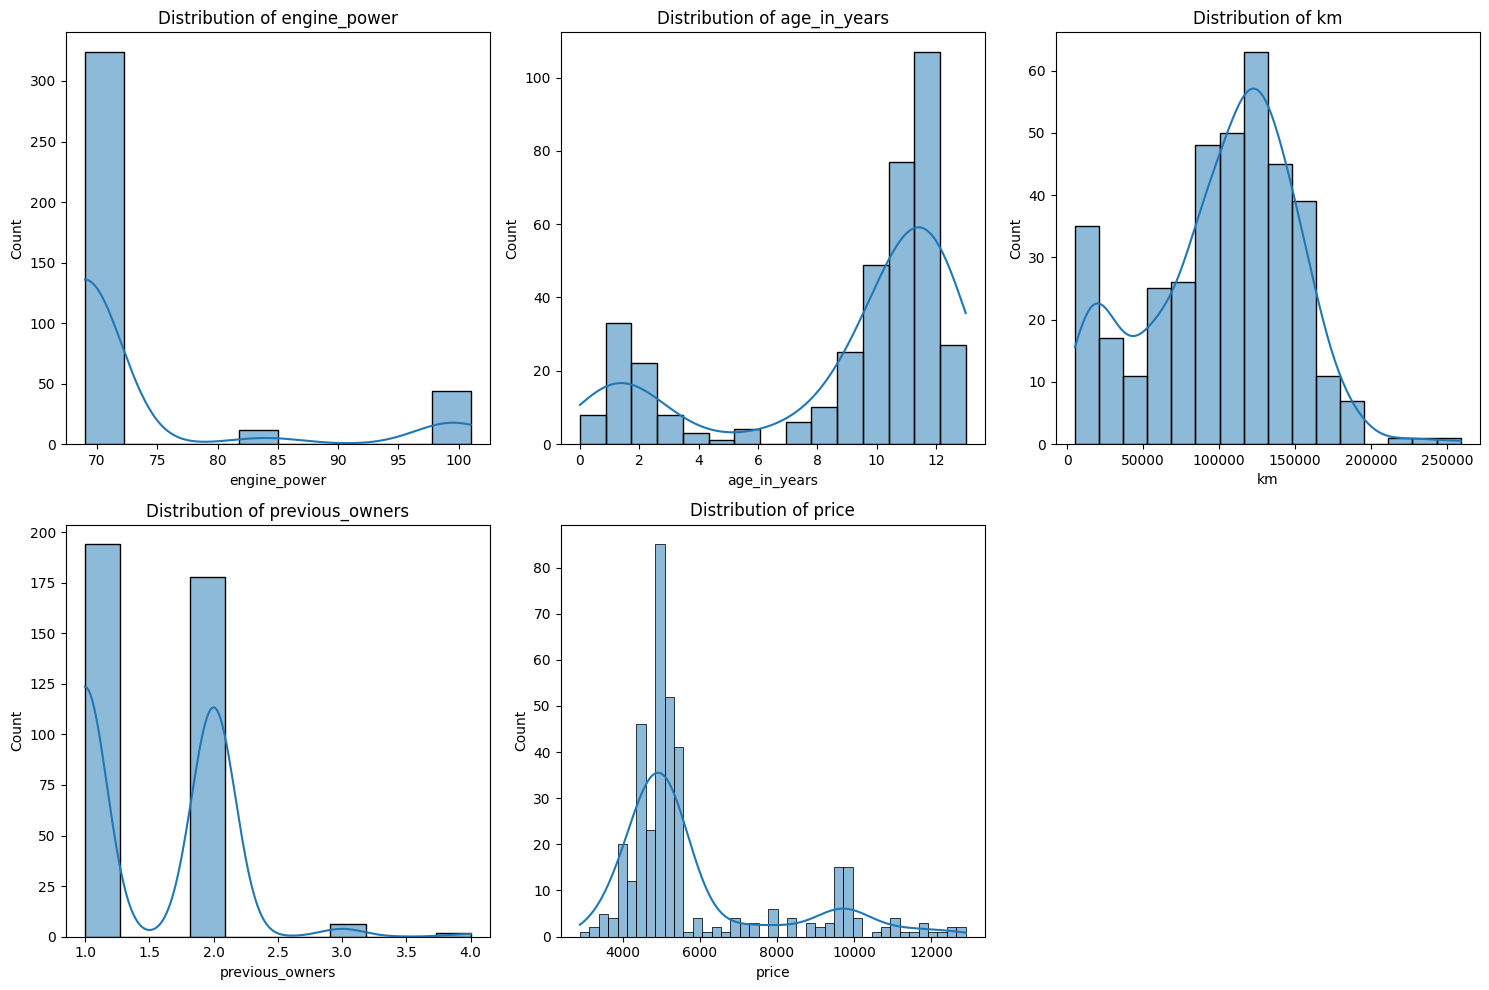

In [48]:
num_columns = ['engine_power', 'age_in_years', 'km', 'previous_owners', 'price']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

W zestawie danych dominują samochody o mocy silnika około 70 KM, mające jednego lub dwóch poprzednich właścicieli. Również większość samochodów jest w wieku około 12 lat z przebiegiem między 50 000 a 150 000 km, a ceny samochodów są głównie skoncentrowane w przedziale 4000-6000.

### Macierz korelacji:

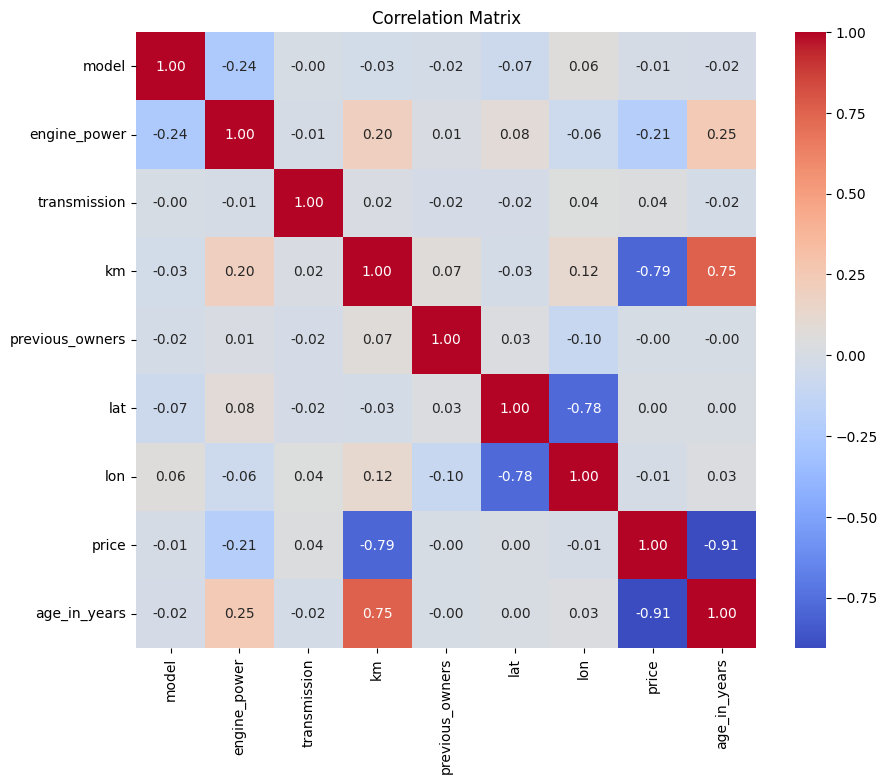


Correlation matrix:
                     model  engine_power  transmission        km  \
model            1.000000     -0.243687     -0.004835 -0.028184   
engine_power    -0.243687      1.000000     -0.008936  0.201903   
transmission    -0.004835     -0.008936      1.000000  0.016285   
km              -0.028184      0.201903      0.016285  1.000000   
previous_owners -0.021613      0.011278     -0.016979  0.069045   
lat             -0.067795      0.079719     -0.017240 -0.025419   
lon              0.056862     -0.060376      0.044086  0.115729   
price           -0.010280     -0.205434      0.036478 -0.788273   
age_in_years    -0.017667      0.247176     -0.020503  0.754994   

                 previous_owners       lat       lon     price  age_in_years  
model                  -0.021613 -0.067795  0.056862 -0.010280     -0.017667  
engine_power            0.011278  0.079719 -0.060376 -0.205434      0.247176  
transmission           -0.016979 -0.017240  0.044086  0.036478     -0.

In [49]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation matrix:\n", correlation_matrix)

Cena jest silnie negatywnie skorelowana z wiekiem samochodu (-0.911764) oraz jego przebiegiem (-0.787404), w prostych słowach  starsze i bardziej wyeksploatowane samochody mają tendencję do niższych cen.

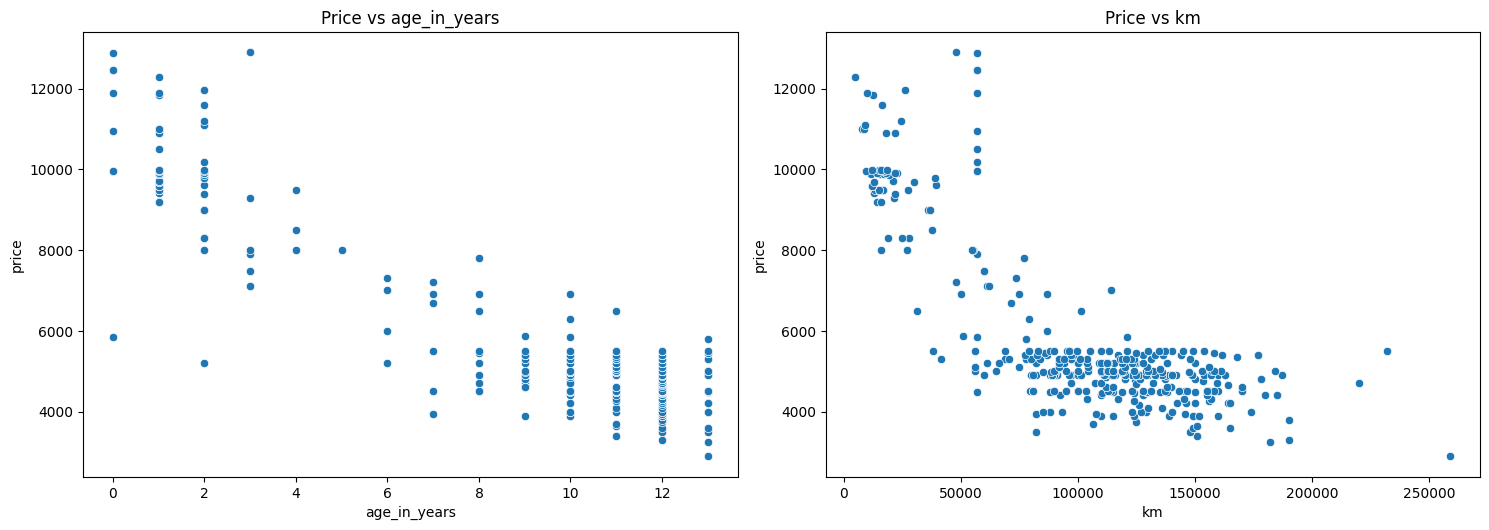

In [50]:
plt.figure(figsize=(15, 10))
for i, col in enumerate([ 'age_in_years', 'km']):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

Jak widzimy starsze samochody mają niższą cenę w porówaniu do droższych oraz samochody z większym przebiegiem mają niższą cenę.

### Model regresji

In [51]:
X = df[['engine_power', 'age_in_years', 'km']] #zmienne wejściowe
y = df['price'] #zmienna wyjściowa

Podział na dane treningowe i testowe

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R-squared (R²) score:", r2)


Mean Squared Error (MSE): 625979.8539860346
R-squared (R²) score: 0.8773691015236069


Model przewiduje cenę auta w 87% prawidłowo, spróbujmy znaleźć coś co ulepszy nasz model

# Model regresji z PCA

Najpierw przetwarzamy dane

In [81]:
df_pca = pd.read_csv("fiat.csv")
df_pca['age_in_years'] = np.round(df_pca['age_in_days'] / 365)

df_pca.drop(columns=['age_in_days'], inplace=True)

for column in df_pca:
    if df_pca[column].isnull().sum() > 0:  
        mean_value = df_pca[column].mean().round()  
        df_pca[column].fillna(mean_value, inplace=True)
        print("\n" + column + ": " + str(mean_value))


if 'id' in df_pca.columns:
    df_pca.drop('id', axis=1, inplace=True)


previous_owners: 2.0

lat: 44.0

lon: 11.0

price: 5855.0


C:\Users\karol\AppData\Local\Temp\ipykernel_17100\1270193067.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pca[column].fillna(mean_value, inplace=True)


In [83]:
X = df_pca.drop(columns=['price'])
y = df_pca['price']

categorical_cols = ['model', 'transmission']
numerical_cols = ['engine_power', 'age_in_years', 'km', 'previous_owners', 'lat', 'lon']


In [86]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    ('regressor', LinearRegression())
])

Podział na zbiór treningowy i testowy

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['engine_power',
                                                   'age_in_years', 'km',
                                                   'previous_owners', 'lat',
                                                   'lon']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['model', 'transmission'])])),
                ('pca', PCA(n_components=0.95)),
                ('regressor', LinearRegression())])

In [88]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'r2:{r2}')


MSE: 603246.3607867564
r2:0.8818226453218337


Otrzymujemy 88%


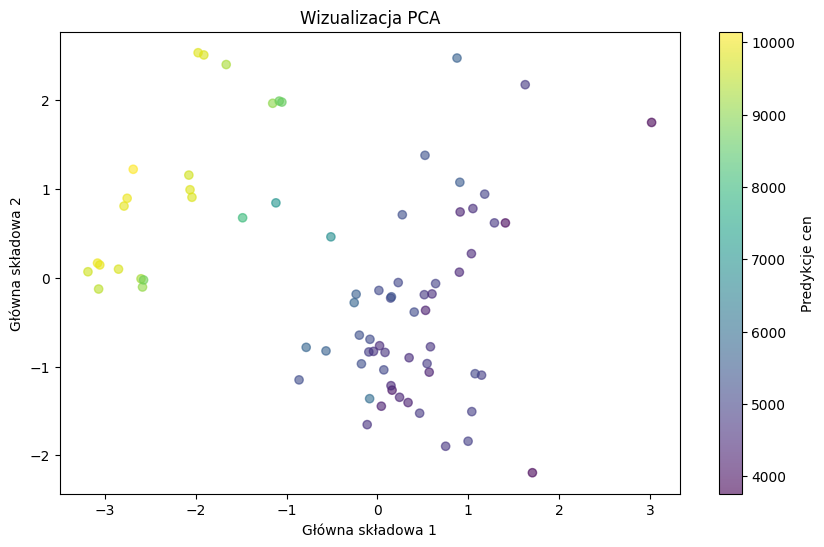

In [89]:
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)
pca = model.named_steps['pca']
X_test_pca = pca.transform(X_test_transformed)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.colorbar(label='Predykcje cen')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Wizualizacja PCA')
plt.show()


Główne składowe 1 i 2 Reprezentują kombinacje liniowe oryginalnych cech (engine_power, age_in_years, km, previous_owners, lat, lon)

# Regresja z RandomForest

W tym wypadku nie przetwarzamy danych, bierzemy je z naszego pierwszego modelu. 

In [74]:
X = df.drop(columns=['price'])
y = df['price']

Następnie skalujemy cechy 

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Podział danych na zestawy treningowe i testowe oraz tworzymy model Random Forest Regressor

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Dokonujemy predykcji i oceny modelu

In [77]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 374020.76967894734
R^2: 0.9267284677893409


Jak widać w przypadku naszych trzech modeli najbardziej dopasowany jest model z random forest i wynosi 92%

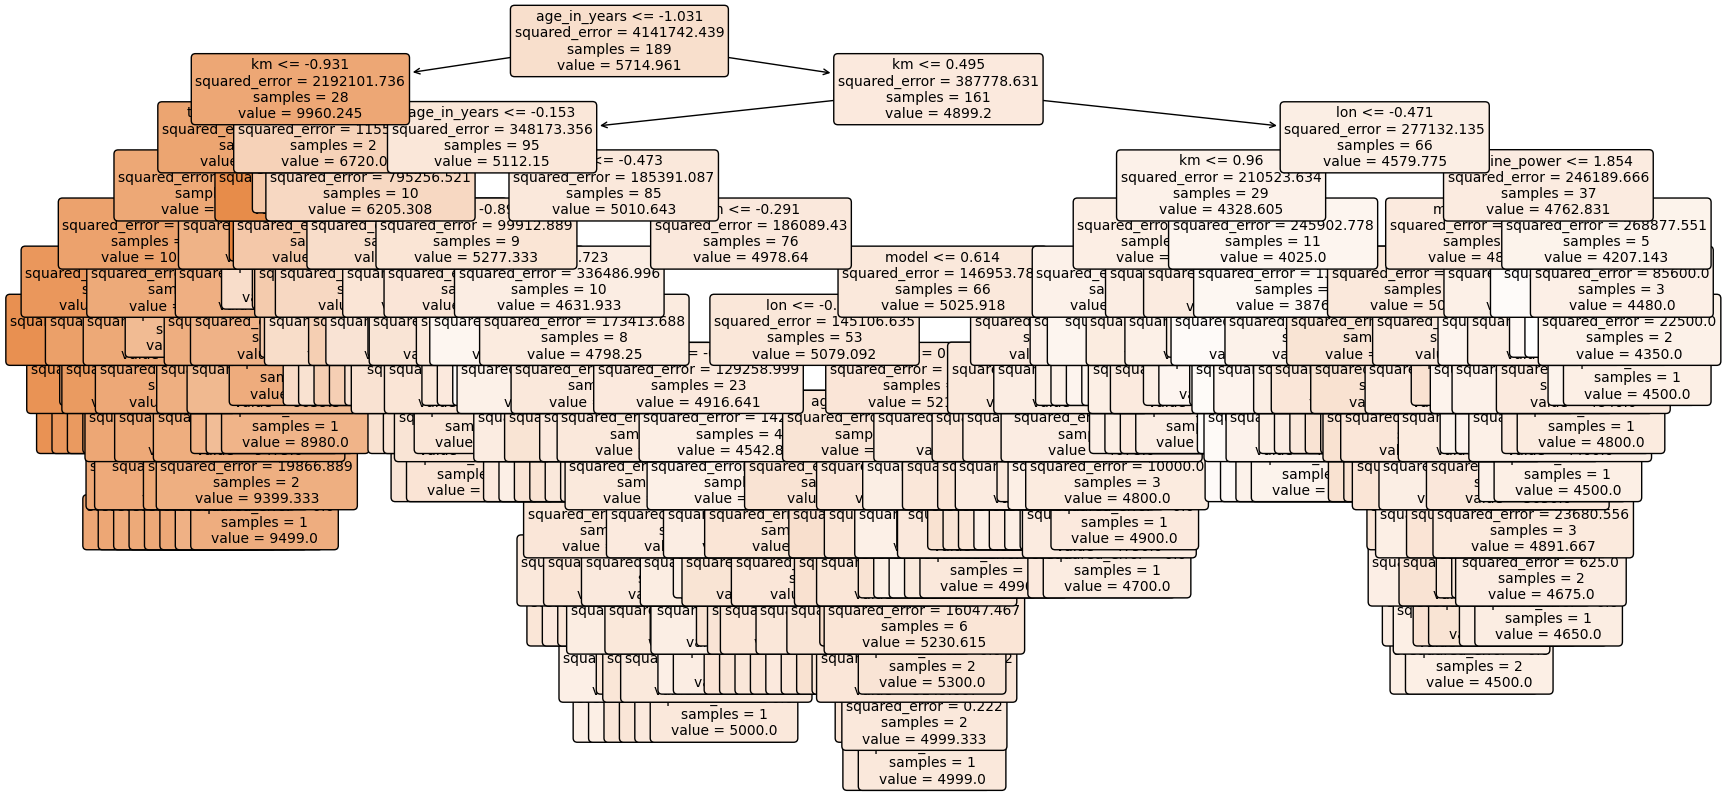

In [62]:
estimator = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()